# Pandas

[Pandas](https://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of tabular data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

In [2]:
# to install

#!conda install pandas

# Pandas Fundamentals

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an _index_. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.

In [2]:
names = ['Isabelle', 'Lerato', 'Sim']
values = [160, 165, 120]
height = pd.Series(values, index=names)
height

Isabelle    160
Lerato      165
Sim         120
dtype: int64

Series have built in plotting methods.

<AxesSubplot:>

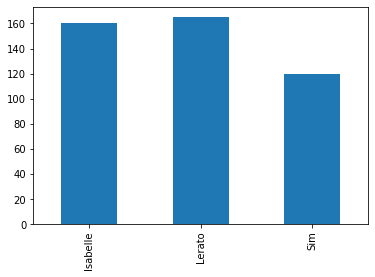

In [3]:
height.plot(kind='bar')

Arithmetic operations and most numpy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [6]:
np.log(height) / height**2

Isabelle    0.000198
Lerato      0.000188
Sim         0.000332
dtype: float64

We can access the underlying index object if we need to:

In [8]:
height.index

Index(['Isabelle', 'Lerato', 'Sim'], dtype='object')

### Indexing

We can get values back out using the index via the `.loc` attribute

In [10]:
height.loc['Sim']

120

Or by raw position using `.iloc`

In [11]:
height.iloc[2]

120

We can pass a list or array to loc to get multiple rows back:

In [12]:
height.loc[['Isabelle', 'Lerato']]

Isabelle    160
Lerato      165
dtype: int64

And we can even use slice notation

In [13]:
height.loc['Isabelle':'Lerato']

Isabelle    160
Lerato      165
dtype: int64

In [14]:
height.iloc[:2]

Isabelle    160
Lerato      165
dtype: int64

If we need to, we can always get the raw data back out as well

In [15]:
height.values # a numpy array

array([160, 165, 120])

In [16]:
height.index # a pandas Index object

Index(['Isabelle', 'Lerato', 'Sim'], dtype='object')

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single "column". A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [17]:
# first we create a dictionary
data = {'age': [31, 25, 3],
        'height': [160, 165, 120],
        'weight': [60, np.nan, 11.3]}
df = pd.DataFrame(data, index=['Isabelle', 'Lerato', 'Sim'])
df

,age,height,weight
Isabelle,31,160,60.0
Lerato,25,165,NaN
Sim,3,120,11.3


Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Isabelle to Sim
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     3 non-null      int64  
 1   height  3 non-null      int64  
 2   weight  2 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 96.0+ bytes


A wide range of statistical functions are available on both Series and DataFrames.

In [19]:
df.min()

age         3.0
height    120.0
weight     11.3
dtype: float64

In [20]:
df.mean()

age        19.666667
height    148.333333
weight     35.650000
dtype: float64

In [21]:
df.std()

age       14.742230
height    24.664414
weight    34.436100
dtype: float64

In [22]:
df.describe()

,age,height,weight
count,3.000000,3.000000,2.0000
mean,19.666667,148.333333,35.6500
std,14.742230,24.664414,34.4361
min,3.000000,120.000000,11.3000
25%,14.000000,140.000000,23.4750
50%,25.000000,160.000000,35.6500
75%,28.000000,162.500000,47.8250
max,31.000000,165.000000,60.0000


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [23]:
df['height']

Isabelle    160
Lerato      165
Sim         120
Name: height, dtype: int64

...or using attribute syntax.

In [24]:
df.height

Isabelle    160
Lerato      165
Sim         120
Name: height, dtype: int64

Indexing works very similar to series

In [25]:
df.loc['Lerato']

age        25.0
height    165.0
weight      NaN
Name: Lerato, dtype: float64

In [26]:
df.iloc[2]

age         3.0
height    120.0
weight     11.3
Name: Sim, dtype: float64

But we can also specify the column we want to access

In [27]:
df.loc['Lerato', 'age']

25

In [28]:
df.iloc[:2, 0]

Isabelle    31
Lerato      25
Name: age, dtype: int64

If we make a calculation using columns from the DataFrame, it will keep the same index:

In [29]:
df.weight / df.height

Isabelle    0.375000
Lerato           NaN
Sim         0.094167
dtype: float64

Which we can easily add as another column to the DataFrame:

In [30]:
df['density'] = df.weight / df.height
df

,age,height,weight,density
Isabelle,31,160,60.0,0.375000
Lerato,25,165,NaN,NaN
Sim,3,120,11.3,0.094167


## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [31]:
education = pd.Series(['Masters', 'Masters', 'Pre-school', 'Undergrad'],
                     index=['Isabelle', 'Lerato', 'Sim', 'Amanda'],
                     name='education')
education

Isabelle       Masters
Lerato         Masters
Sim         Pre-school
Amanda       Undergrad
Name: education, dtype: object

In [32]:
# returns a new DataFrame
df.join(education)

,age,height,weight,density,education
Isabelle,31,160,60.0,0.375000,Masters
Lerato,25,165,NaN,NaN,Masters
Sim,3,120,11.3,0.094167,Pre-school


In [34]:
# returns a new DataFrame
df.join(education, how='right')

,age,height,weight,density,education
Isabelle,31.0,160.0,60.0,0.375000,Masters
Lerato,25.0,165.0,NaN,NaN,Masters
Sim,3.0,120.0,11.3,0.094167,Pre-school
Amanda,NaN,NaN,NaN,NaN,Undergrad


In [36]:
# returns a new DataFrame
everyone = df.reindex(['Isabelle', 'Lerato', 'Sim', 'Amanda','Sonia'])
everyone

,age,height,weight,density
Isabelle,31.0,160.0,60.0,0.375000
Lerato,25.0,165.0,NaN,NaN
Sim,3.0,120.0,11.3,0.094167
Amanda,NaN,NaN,NaN,NaN
Sonia,NaN,NaN,NaN,NaN


We can also index using a boolean series. This is very useful

In [37]:
adults = df[df.age > 18]
adults

,age,height,weight,density
Isabelle,31,160,60.0,0.375
Lerato,25,165,NaN,NaN


In [38]:
df['is_adult'] = df.age > 18
df

,age,height,weight,density,is_adult
Isabelle,31,160,60.0,0.375000,True
Lerato,25,165,NaN,NaN,True
Sim,3,120,11.3,0.094167,False


### Modifying Values

We often want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [39]:
df.loc['Lerato', 'height'] = 163
df.loc['Isabelle', 'weight'] += 1
df

,age,height,weight,density,is_adult
Isabelle,31,160,61.0,0.375000,True
Lerato,25,163,NaN,NaN,True
Sim,3,120,11.3,0.094167,False


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

<AxesSubplot:xlabel='age', ylabel='height'>

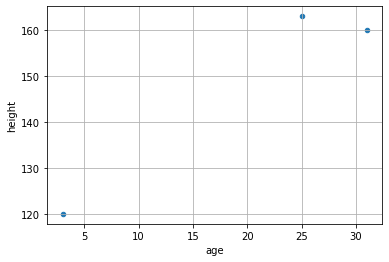

In [40]:
df.plot(kind='scatter', x='age', y='height', grid=True)

<AxesSubplot:>

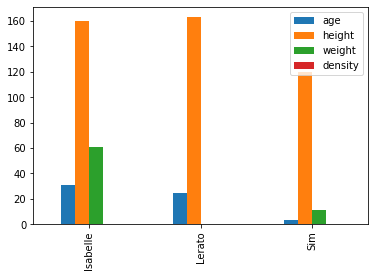

In [41]:
df.plot(kind='bar')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

<AxesSubplot:>

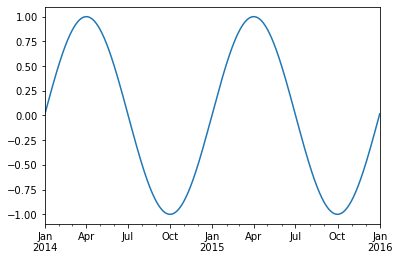

In [42]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python's slicing notation inside `.loc` to select a date range.

<AxesSubplot:>

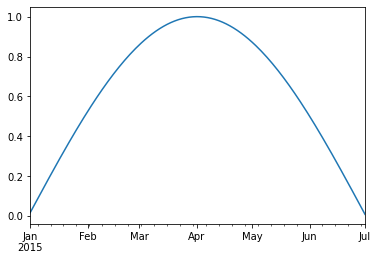

In [43]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

The TimeIndex object has lots of useful attributes

In [44]:
timeseries.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=731)

In [45]:
timeseries.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
           dtype='int64', length=731)

## Reading Data Files: Weather Station Data

In this example, we will use NOAA weather station data from https://www.ncdc.noaa.gov/data-access/land-based-station-data.

The details of files we are going to read are described in this [README file](ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/README.txt).

In [46]:
# some shell code to download some data
! wget ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt
! wget ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/2017/CRND0103-2017-NY_Millbrook_3_W.txt
! head -2 HEADERS.txt | tail -1 > data.txt
! cat CRND0103-2017-NY_Millbrook_3_W.txt >> data.txt

--2021-09-20 07:51:40--  ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt
           => ‘HEADERS.txt’
Resolving ftp.ncdc.noaa.gov (ftp.ncdc.noaa.gov)... 205.167.25.137
Connecting to ftp.ncdc.noaa.gov (ftp.ncdc.noaa.gov)|205.167.25.137|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/data/uscrn/products/daily01 ... done.
==> SIZE HEADERS.txt ... 730
==> PASV ... done.    ==> RETR HEADERS.txt ... done.
Length: 730 (unauthoritative)

HEADERS.txt         100%[===================>]     730  --.-KB/s    in 0,02s   

2021-09-20 07:51:42 (34,7 KB/s) - ‘HEADERS.txt’ saved [730]

--2021-09-20 07:51:42--  ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/2017/CRND0103-2017-NY_Millbrook_3_W.txt
           => ‘CRND0103-2017-NY_Millbrook_3_W.txt’
Resolving ftp.ncdc.noaa.gov (ftp.ncdc.noaa.gov)... 205.167.25.137
Connecting to ftp.ncdc.noaa.gov (ftp.ncdc.noaa.gov)|205.167.25.137|:21... conne

We now have a text file on our hard drive called `data.txt`. Examine it.

To read it into pandas, we will use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly complex and powerful. You can use it to extract data from almost any text file. However, you need to understand how to use its various options.

With no options, this is what we get.

In [41]:
df = pd.read_csv('data.txt')
df.head()

,WBANNO LST_DATE CRX_VN LONGITUDE LATITUDE T_DAILY_MAX T_DAILY_MIN T_DAILY_MEAN T_DAILY_AVG P_DAILY_CALC SOLARAD_DAILY SUR_TEMP_DAILY_TYPE SUR_TEMP_DAILY_MAX SUR_TEMP_DAILY_MIN SUR_TEMP_DAILY_AVG RH_DAILY_MAX RH_DAILY_MIN RH_DAILY_AVG SOIL_MOISTURE_5_DAILY SOIL_MOISTURE_10_DAILY SOIL_MOISTURE_20_DAILY SOIL_MOISTURE_50_DAILY SOIL_MOISTURE_100_DAILY SOIL_TEMP_5_DAILY SOIL_TEMP_10_DAILY SOIL_TEMP_20_DAILY SOIL_TEMP_50_DAILY SOIL_TEMP_100_DAILY
0,64756 20170101 2.422 -73.74 41.79 6.6 ...
1,64756 20170102 2.422 -73.74 41.79 4.0 ...
2,64756 20170103 2.422 -73.74 41.79 4.9 ...
3,64756 20170104 2.422 -73.74 41.79 8.7 ...
4,64756 20170105 2.422 -73.74 41.79 -0.5 ...


Pandas failed to identify the different columns. This is because it was expecting standard CSV (comma-separated values) file. In our file, instead, the values are separated by whitespace. And not a single whilespace--the amount of whitespace between values varies. We can tell pandas this using the `sep` keyword.

In [42]:
df = pd.read_csv('data.txt', sep='\s+')
df.head()

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64756,20170101,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,...,-99.0,-99.0,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
1,64756,20170102,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,...,-99.0,-99.0,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2,64756,20170103,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,...,-99.0,-99.0,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
3,64756,20170104,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,...,-99.0,-99.0,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
4,64756,20170105,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,...,-99.0,-99.0,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


Great! It worked. 

If we look closely, we will see there are lots of -99 and -9999 values in the file. The [README file](ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/README.txt) tells us that these are values used to represent missing data. Let's tell this to pandas.

In [43]:
df = pd.read_csv('data.txt', sep='\s+', na_values=[-9999.0, -99.0])
df.head()

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64756,20170101,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
1,64756,20170102,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2,64756,20170103,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
3,64756,20170104,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
4,64756,20170105,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


Great. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
WBANNO                     365 non-null int64
LST_DATE                   365 non-null int64
CRX_VN                     365 non-null float64
LONGITUDE                  365 non-null float64
LATITUDE                   365 non-null float64
T_DAILY_MAX                364 non-null float64
T_DAILY_MIN                364 non-null float64
T_DAILY_MEAN               364 non-null float64
T_DAILY_AVG                364 non-null float64
P_DAILY_CALC               364 non-null float64
SOLARAD_DAILY              364 non-null float64
SUR_TEMP_DAILY_TYPE        365 non-null object
SUR_TEMP_DAILY_MAX         364 non-null float64
SUR_TEMP_DAILY_MIN         364 non-null float64
SUR_TEMP_DAILY_AVG         364 non-null float64
RH_DAILY_MAX               364 non-null float64
RH_DAILY_MIN               364 non-null float64
RH_DAILY_AVG               364 non-null float64
SOIL_MOISTURE_5_DAILY      317 non-n

One problem here is that pandas did not recognize the `LDT_DATE` column as a date. Let's help it.

In [45]:
df = pd.read_csv('data.txt', sep='\s+',
                 na_values=[-9999.0, -99.0],
                 parse_dates=[1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
WBANNO                     365 non-null int64
LST_DATE                   365 non-null datetime64[ns]
CRX_VN                     365 non-null float64
LONGITUDE                  365 non-null float64
LATITUDE                   365 non-null float64
T_DAILY_MAX                364 non-null float64
T_DAILY_MIN                364 non-null float64
T_DAILY_MEAN               364 non-null float64
T_DAILY_AVG                364 non-null float64
P_DAILY_CALC               364 non-null float64
SOLARAD_DAILY              364 non-null float64
SUR_TEMP_DAILY_TYPE        365 non-null object
SUR_TEMP_DAILY_MAX         364 non-null float64
SUR_TEMP_DAILY_MIN         364 non-null float64
SUR_TEMP_DAILY_AVG         364 non-null float64
RH_DAILY_MAX               364 non-null float64
RH_DAILY_MIN               364 non-null float64
RH_DAILY_AVG               364 non-null float64
SOIL_MOISTURE_5_DAILY      

It worked! Finally, let's tell pandas to use the date column as the index.

In [46]:
df = df.set_index('LST_DATE')
df.head()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,64756,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,8.68,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
2017-01-02,64756,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,2.08,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2017-01-03,64756,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,0.68,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
2017-01-04,64756,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,2.85,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
2017-01-05,64756,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,4.90,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


We can now access values by time:

In [47]:
df.loc['2017-08-07']

WBANNO                     64756
CRX_VN                     2.422
LONGITUDE                 -73.74
LATITUDE                   41.79
T_DAILY_MAX                 19.3
T_DAILY_MIN                 12.3
T_DAILY_MEAN                15.8
T_DAILY_AVG                 16.3
P_DAILY_CALC                 4.9
SOLARAD_DAILY               3.93
SUR_TEMP_DAILY_TYPE            C
SUR_TEMP_DAILY_MAX          22.3
SUR_TEMP_DAILY_MIN          11.9
SUR_TEMP_DAILY_AVG          17.7
RH_DAILY_MAX                94.7
RH_DAILY_MIN                76.4
RH_DAILY_AVG                89.5
SOIL_MOISTURE_5_DAILY      0.148
SOIL_MOISTURE_10_DAILY     0.113
SOIL_MOISTURE_20_DAILY     0.094
SOIL_MOISTURE_50_DAILY     0.114
SOIL_MOISTURE_100_DAILY    0.151
SOIL_TEMP_5_DAILY           21.4
SOIL_TEMP_10_DAILY          21.7
SOIL_TEMP_20_DAILY          22.1
SOIL_TEMP_50_DAILY          22.2
SOIL_TEMP_100_DAILY         21.5
Name: 2017-08-07 00:00:00, dtype: object

Or use slicing to get a range:

In [48]:
df.loc['2017-07-01':'2017-07-31']

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-01,64756,2.422,-73.74,41.79,28.0,19.7,23.9,23.8,0.2,19.28,...,0.157,0.136,0.144,0.129,0.163,25.7,25.4,23.7,21.9,19.9
2017-07-02,64756,2.422,-73.74,41.79,29.8,18.4,24.1,23.7,4.0,27.67,...,0.146,0.135,0.143,0.129,0.162,26.8,26.4,24.5,22.3,20.1
2017-07-03,64756,2.422,-73.74,41.79,28.3,15.0,21.7,21.4,0.0,27.08,...,0.141,0.132,0.139,0.128,0.162,26.4,26.3,24.8,22.8,20.3
2017-07-04,64756,2.422,-73.74,41.79,26.8,12.6,19.7,20.0,0.0,29.45,...,0.131,0.126,0.136,0.126,0.161,25.9,25.8,24.6,22.9,20.6
2017-07-05,64756,2.422,-73.74,41.79,28.0,11.9,20.0,20.7,0.0,26.90,...,0.116,0.114,0.131,0.125,0.161,25.3,25.3,24.2,22.8,20.7
2017-07-06,64756,2.422,-73.74,41.79,25.7,14.3,20.0,20.3,0.0,19.03,...,0.105,0.104,0.126,0.124,0.160,24.7,24.7,23.9,22.7,20.9
2017-07-07,64756,2.422,-73.74,41.79,25.8,16.8,21.3,20.0,11.5,13.88,...,0.114,0.100,0.123,0.123,0.160,24.2,24.2,23.4,22.4,20.8
2017-07-08,64756,2.422,-73.74,41.79,29.0,15.3,22.1,21.5,0.0,21.92,...,0.130,0.106,0.122,0.123,0.159,25.5,25.3,23.9,22.4,20.8
2017-07-09,64756,2.422,-73.74,41.79,26.3,10.9,18.6,19.4,0.0,29.72,...,0.119,0.103,0.119,0.121,0.158,24.8,24.8,23.8,22.5,20.8


### Quick Statistics

In [49]:
df.describe()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
count,365.0,365.000000,3.650000e+02,3.650000e+02,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,317.000000,317.000000,336.000000,364.000000,359.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,64756.0,2.470767,-7.374000e+01,4.179000e+01,15.720055,4.037912,9.876374,9.990110,2.796703,13.067665,...,0.183826,0.181009,0.156542,0.138294,0.162850,12.343956,12.308242,12.060440,11.960714,11.971703
std,0.0,0.085997,5.265234e-13,3.842198e-13,10.502087,9.460676,9.727451,9.619168,7.238308,7.953528,...,0.047479,0.052698,0.042763,0.019228,0.013827,9.367795,9.350478,8.761415,8.082871,7.170032
min,64756.0,2.422000,-7.374000e+01,4.179000e+01,-12.300000,-21.800000,-17.000000,-16.700000,0.000000,0.100000,...,0.076000,0.073000,0.069000,0.100000,0.128000,-0.700000,-0.400000,0.200000,0.900000,1.900000
25%,64756.0,2.422000,-7.374000e+01,4.179000e+01,6.900000,-2.775000,2.100000,2.275000,0.000000,6.225000,...,0.149000,0.136000,0.118000,0.118000,0.155000,2.275000,2.075000,2.575000,3.300000,4.100000
50%,64756.0,2.422000,-7.374000e+01,4.179000e+01,17.450000,4.350000,10.850000,11.050000,0.000000,12.860000,...,0.192000,0.198000,0.169000,0.147000,0.166000,13.300000,13.350000,13.100000,12.850000,11.650000
75%,64756.0,2.422000,-7.374000e+01,4.179000e+01,24.850000,11.900000,18.150000,18.450000,1.400000,19.740000,...,0.221000,0.219000,0.188000,0.152250,0.173000,21.025000,21.125000,20.400000,19.800000,19.325000
max,64756.0,2.622000,-7.374000e+01,4.179000e+01,33.400000,20.700000,25.700000,26.700000,65.700000,29.910000,...,0.294000,0.321000,0.231000,0.170000,0.192000,27.600000,27.400000,25.600000,24.100000,22.100000


### Plotting Values

We can now quickly make plots of the data

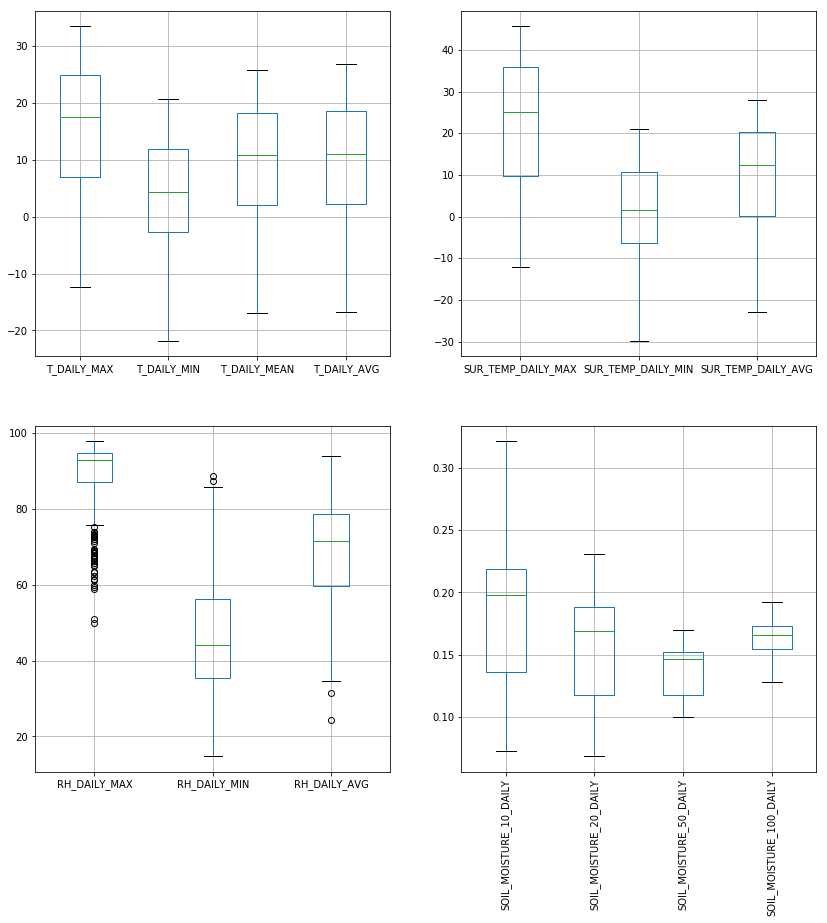

In [50]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14,14))

df.iloc[:, 4:8].boxplot(ax=ax[0,0])
df.iloc[:, 10:14].boxplot(ax=ax[0,1])
df.iloc[:, 14:17].boxplot(ax=ax[1,0])
df.iloc[:, 18:22].boxplot(ax=ax[1,1])


ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90);

Pandas is very "time aware":

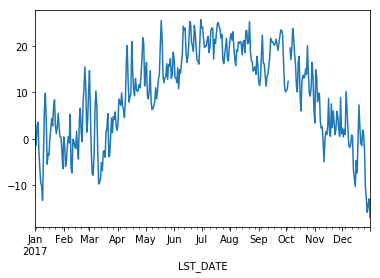

In [51]:
df.T_DAILY_MEAN.plot()

Note: we could also manually create an axis and plot into it.

Text(0.5,1,'Pandas Made This!')

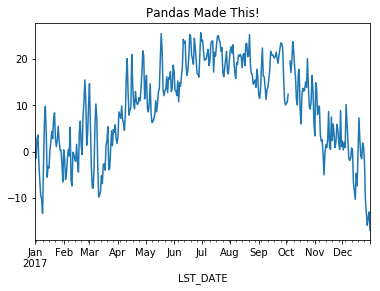

In [52]:
fig, ax = plt.subplots()
df.T_DAILY_MEAN.plot(ax=ax)
ax.set_title('Pandas Made This!')

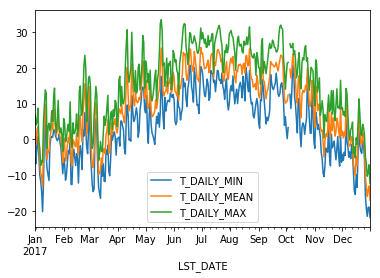

In [53]:
df[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

### Resampling

Since pandas understands time, we can use it to do resampling.

In [54]:
# monthly reampler object
rs_obj = df.resample('MS')
rs_obj

DatetimeIndexResampler [freq=<MonthBegin>, axis=0, closed=left, label=left, convention=start, base=0]

In [55]:
rs_obj.mean()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,64756,2.422000,-73.74,41.79,3.945161,-3.993548,-0.025806,0.038710,3.090323,4.690000,...,0.237100,0.248400,0.204550,0.152871,0.175194,0.209677,0.267742,0.696774,1.438710,2.877419
2017-02-01,64756,2.422000,-73.74,41.79,7.246429,-4.360714,1.442857,1.839286,2.414286,10.364286,...,0.226333,0.243000,0.207545,0.152857,0.175786,1.125000,1.100000,1.192857,1.492857,2.367857
2017-03-01,64756,2.422000,-73.74,41.79,5.164516,-5.335484,-0.090323,0.167742,3.970968,13.113548,...,0.218100,0.229300,0.196258,0.153581,0.174548,2.122581,2.161290,2.345161,2.700000,3.387097
2017-04-01,64756,2.422000,-73.74,41.79,17.813333,5.170000,11.493333,11.540000,2.300000,14.645000,...,0.199767,0.210300,0.190667,0.151000,0.172500,11.066667,10.666667,9.636667,8.426667,6.903333
2017-05-01,64756,2.422000,-73.74,41.79,19.151613,7.338710,13.229032,13.638710,4.141935,16.519677,...,0.206613,0.211000,0.185645,0.147774,0.170032,16.454839,16.290323,15.361290,14.270968,12.696774
2017-06-01,64756,2.422000,-73.74,41.79,25.423333,12.176667,18.796667,18.986667,3.743333,21.655000,...,0.185167,0.184300,0.173167,0.142567,0.167000,22.350000,22.166667,20.880000,19.370000,17.333333
2017-07-01,64756,2.422000,-73.74,41.79,26.912903,15.183871,21.048387,20.993548,2.732258,20.566129,...,0.131258,0.115839,0.116645,0.121065,0.156742,24.993548,24.980645,23.925806,22.745161,21.164516
2017-08-01,64756,2.422000,-73.74,41.79,25.741935,12.954839,19.351613,19.477419,2.758065,18.360000,...,0.143968,0.122290,0.105452,0.115355,0.151034,23.374194,23.519355,22.848387,22.193548,21.377419
2017-09-01,64756,2.422000,-73.74,41.79,24.186667,11.300000,17.746667,17.463333,1.893333,15.154667,...,0.145267,0.139667,0.117367,0.112167,0.142000,20.256667,20.386667,19.966667,19.766667,19.530000


We can chain all of that together

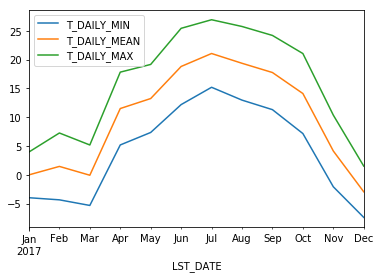

In [56]:
df_mm = df.resample('MS').mean()
df_mm[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

Next time we will dig deeper into resampling, rolling means, and grouping operations (groupby).